In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 
import numpy as np 
from sklearn.model_selection import train_test_split  
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder 


In [2]:
# import dataset from sklearn
#iris=datasets.load_iris(as_frame=True).frame

In [3]:
iris=pd.read_csv("iris.csv")

In [4]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris[iris.duplicated(keep=False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


<Axes: xlabel='variety', ylabel='count'>

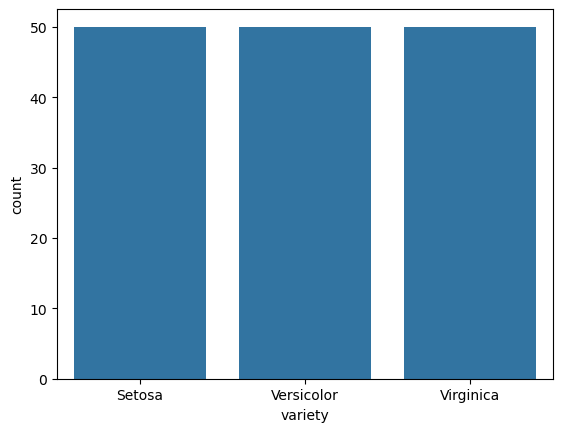

In [7]:
import seaborn as sns
counts=iris['variety'].value_counts()
sns.barplot(data=counts)

#### Perform label encoding of target column

In [9]:
# Encode the three flower classes as 0,1,2

labelencoder=LabelEncoder()
iris['variety']=labelencoder.fit_transform(iris[['variety']])
iris.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [12]:
x=iris.drop(columns=['variety'])
y=iris['variety']
x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: variety, dtype: int32

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=1)
x_train.head()

,sepal.length,sepal.width,petal.length,petal.width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [14]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred=model.predict(x_test)
pd.DataFrame({'y_pred ':y_pred})

,y_pred
0,0
1,1
2,1
3,0
4,2
5,1
6,2
7,0
8,0
9,2


In [16]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [17]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=None)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

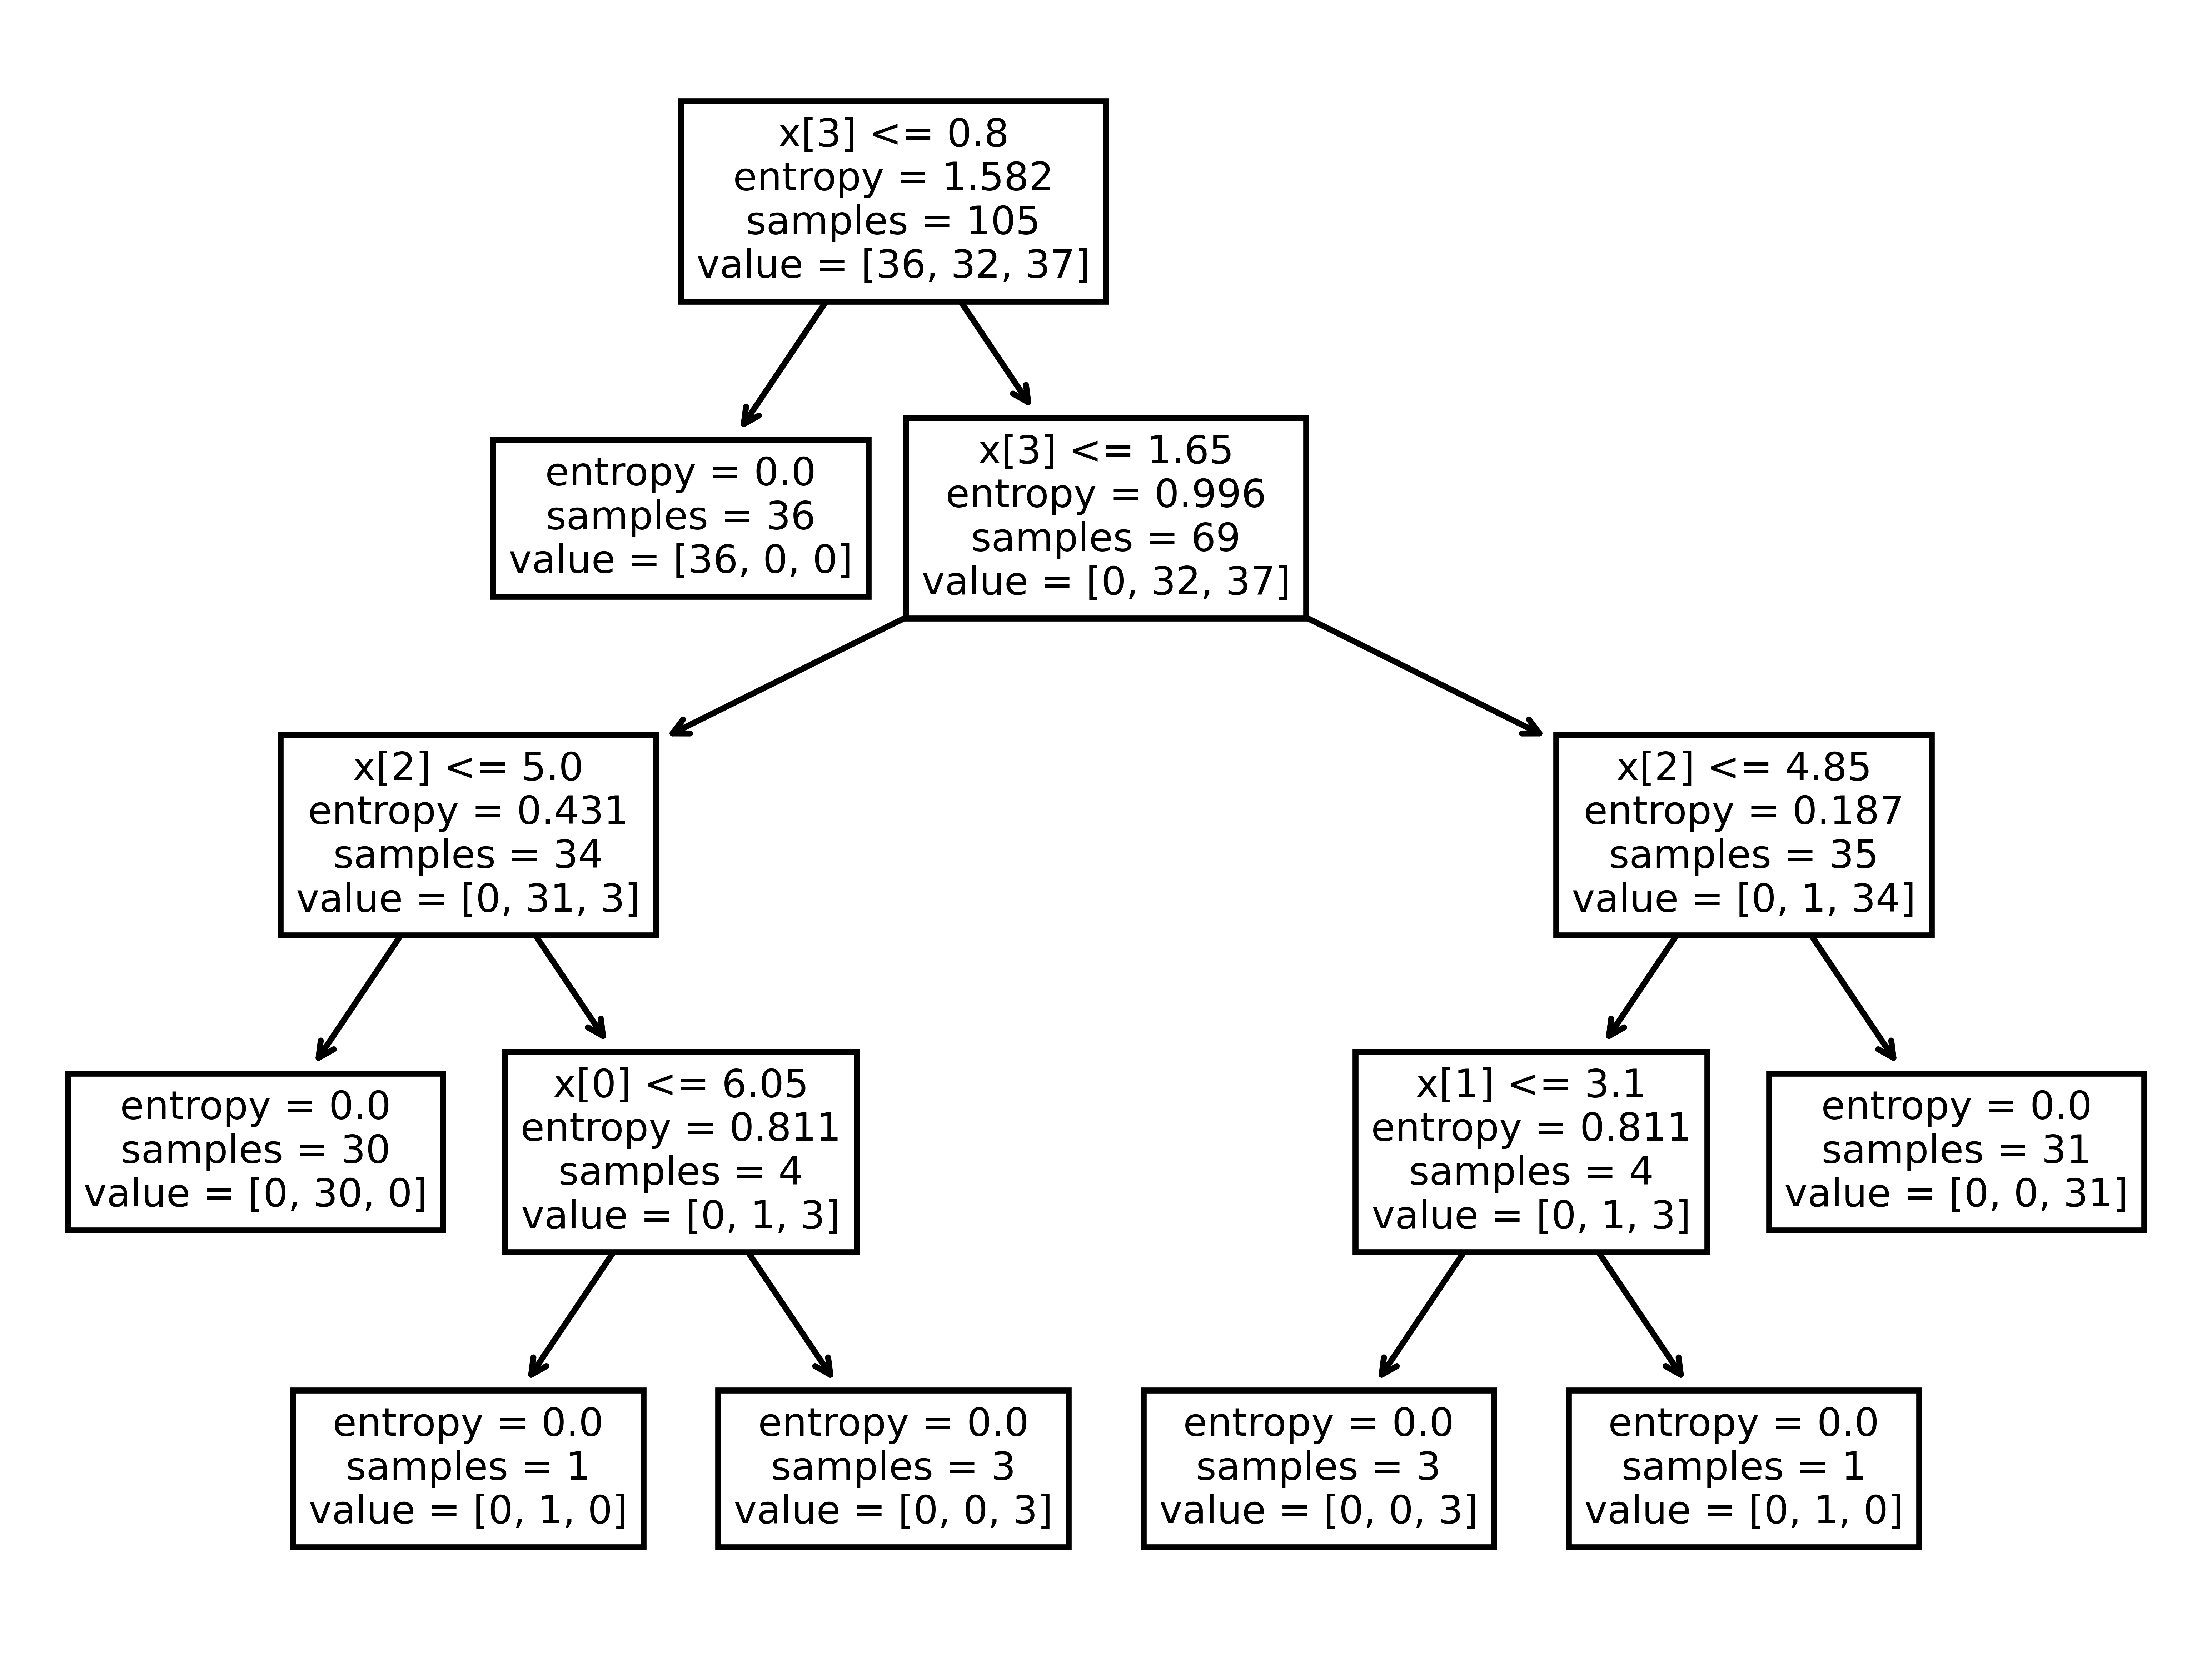

In [18]:
# plot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);

[Text(0.4, 0.9, 'petal width (cm) <= 0.8\nentropy = 1.582\nsamples = 105\nvalue = [36, 32, 37]\nclass = virginica'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'petal width (cm) <= 1.65\nentropy = 0.996\nsamples = 69\nvalue = [0, 32, 37]\nclass = virginica'),
 Text(0.2, 0.5, 'petal length(cm) <= 5.0\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]\nclass = versicolor'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'sepal length (cm) <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.8, 0.5, 'petal length(cm) <= 4.85\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]\nclass = virginica'),
 Text(0.7, 0.3, 'sepal width (cm) <= 3.1\nentropy = 0.811\nsamples = 4\nvalue = 

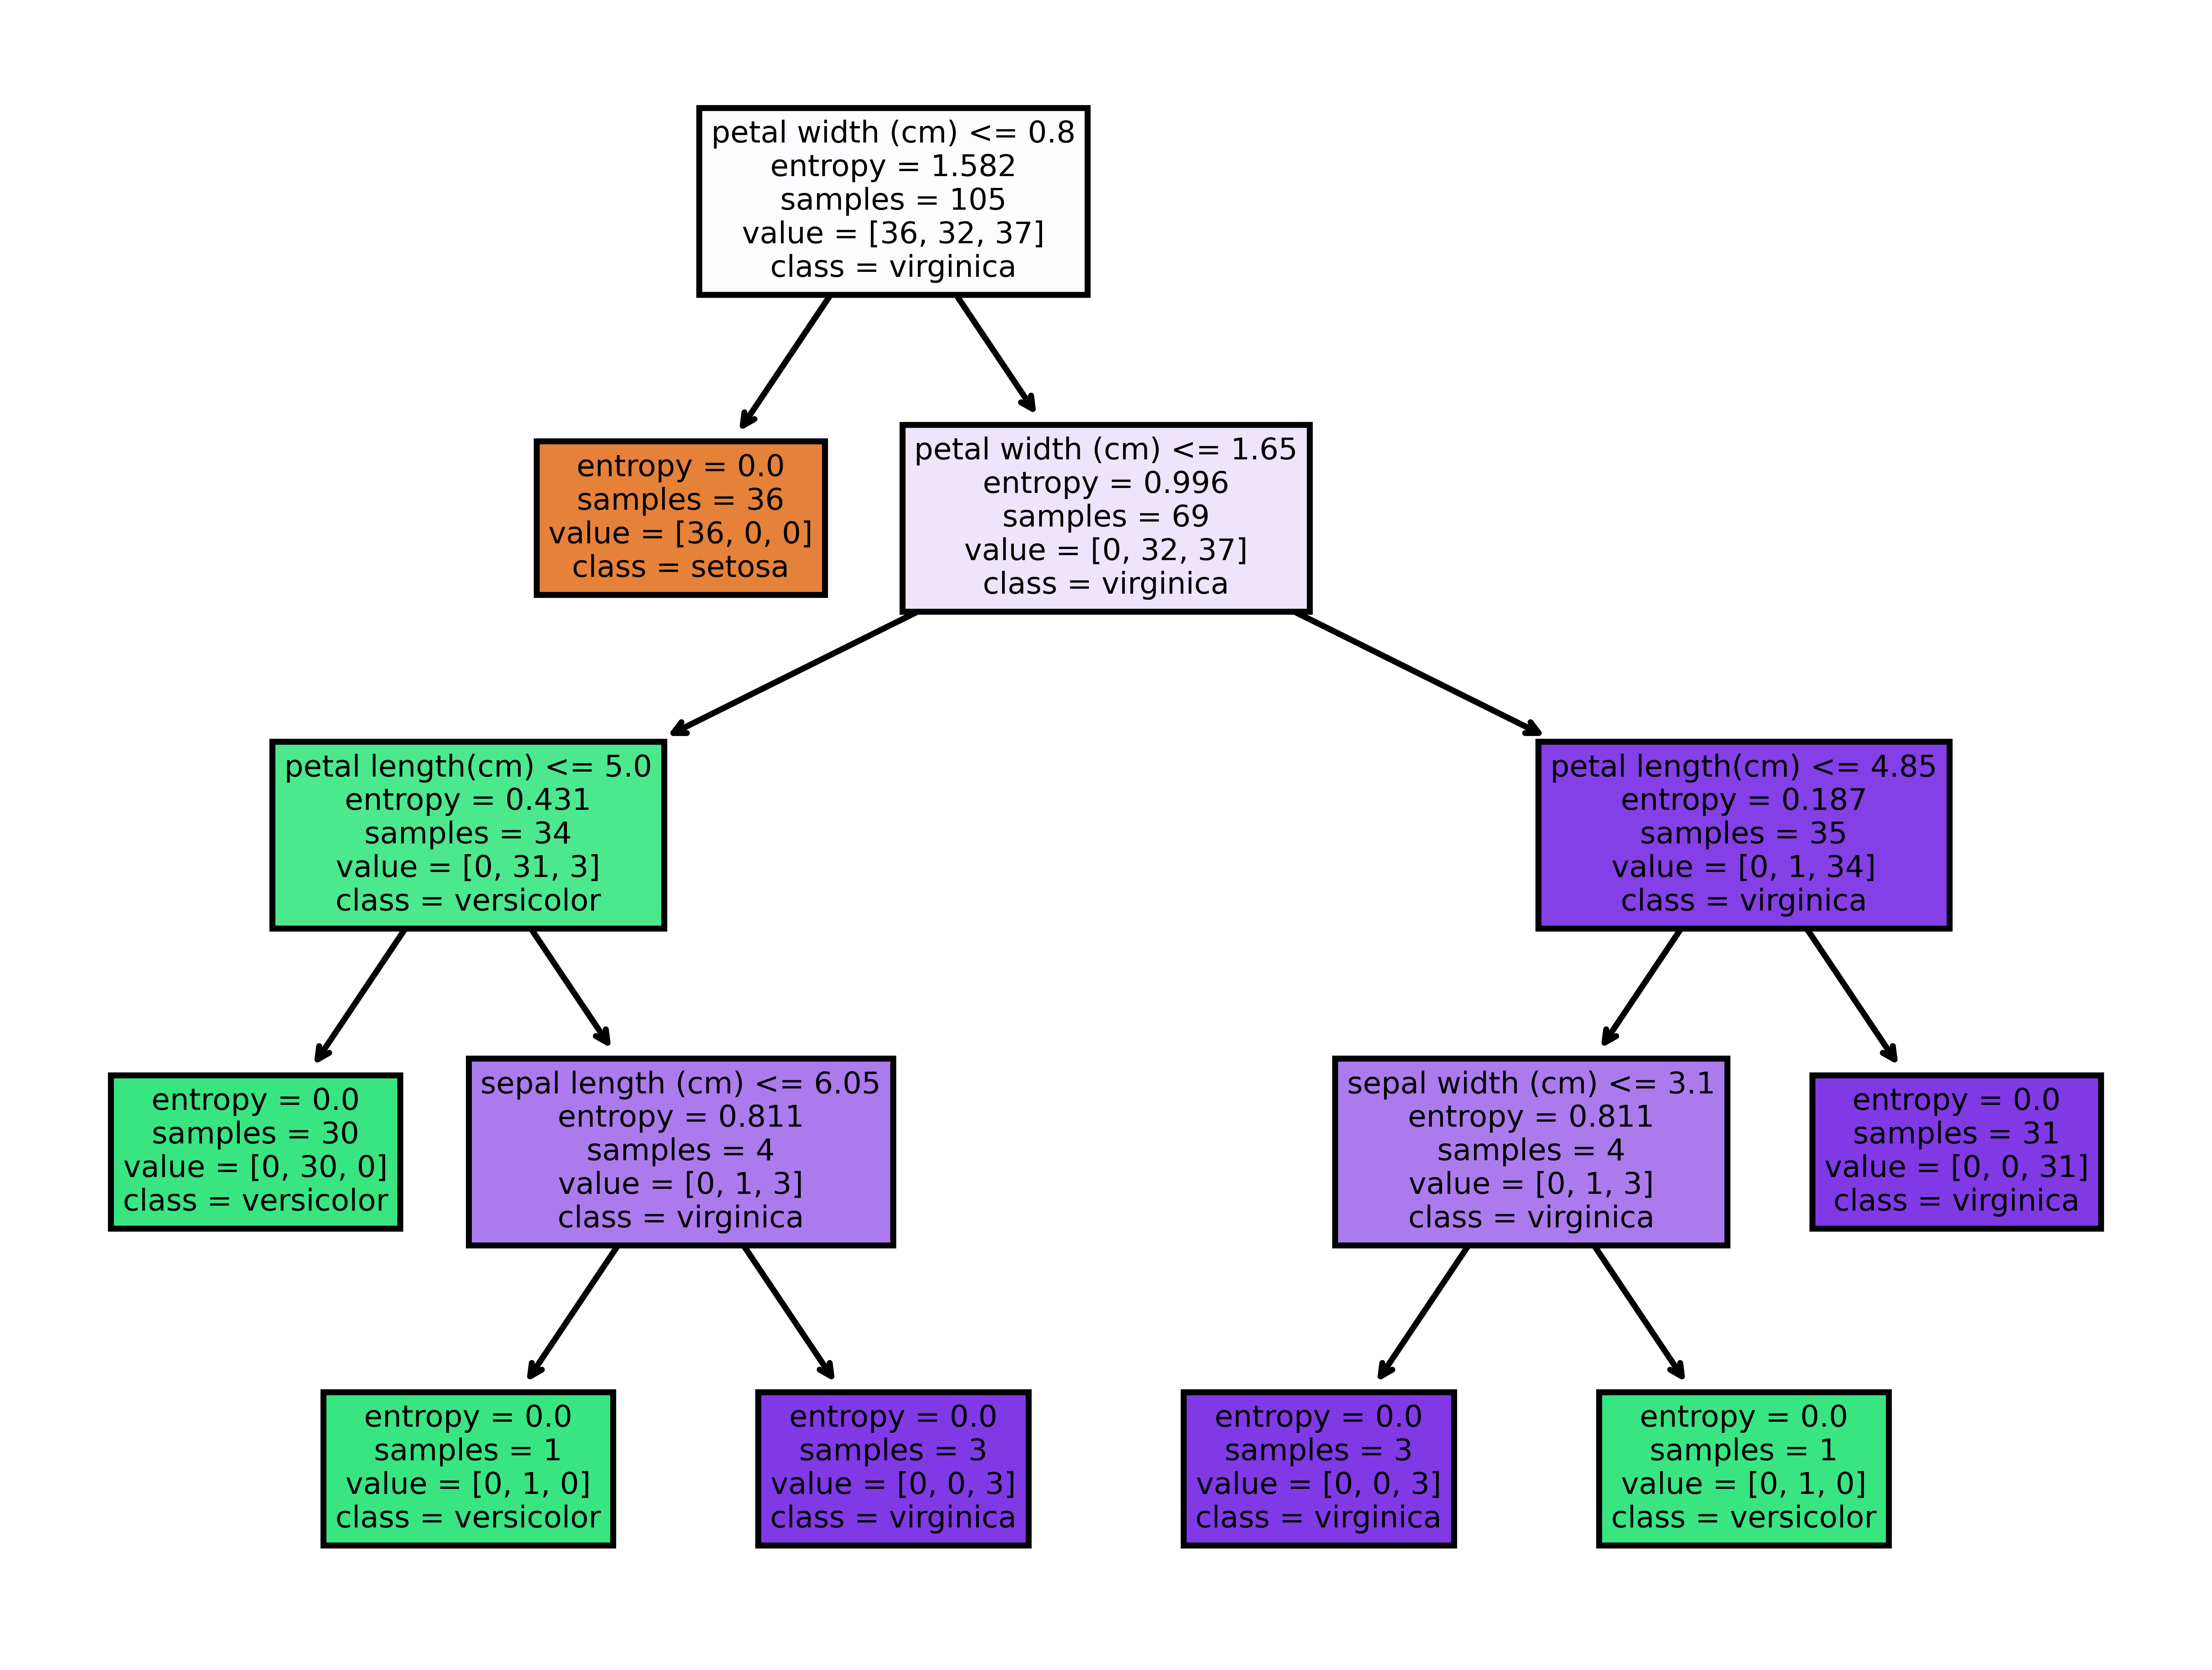

In [19]:
fn=['sepal length (cm)','sepal width (cm)','petal length(cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [39]:
# predictin on test data
preds=model.predict(x_test) # predicting on test data set
preds

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [41]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

